# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tags = pd.read_excel("tag_subgraphs.xlsx")

In [17]:
tag_list = []
for c in tags.columns:
    tag_list+=tags[c].dropna().tolist()
tag_list_index = np.random.choice(len(tag_list) , replace = False, size = 50)
new_tag_list = []
for t in tag_list_index:
    new_tag_list.append(tag_list[t])

In [18]:
len(set(tag_list))

2790

# TF-IDF + Cosine Similarity

In [10]:
import pandas as pd
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.sparse as sparse
from ast import literal_eval
import time
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [11]:
def tfidf_names(names):
    """ return cosine similarity matrix: CSM[names1_index][names2_index] = cosine similarity score for an entry in names1 and names2."""
    t1 = time.time()
    analyzer = "char" #[‘word’, ‘char’, ‘char_wb’]
    ngram_range = (2,4) #feature unit: 1 whole word
    max_df = 1.0 #default
    min_df = 1 #means no lower threshold
    binary = False #Take mutiple occurence of a word in name into account
    use_idf = True #Take unit importance in the dataset into accout
    smooth_idf = True #prevent zero division ?
    norm = None #each vector is nomalized so their dot product is cosine similarity
    vectorizer = TfidfVectorizer(analyzer = analyzer, ngram_range = ngram_range, max_df = max_df,
                            min_df = min_df, binary = binary, use_idf = use_idf, smooth_idf = smooth_idf, norm = norm)
    CSM_all_names = vectorizer.fit_transform(names)
    preprocessor = vectorizer.build_preprocessor()
    t = time.time()-t1
    print("Match COMPLETED IN:", t)
    return vectorizer, preprocessor, CSM_all_names

def handle_tfidf_score(tfidf1, tfidf2):
    """
    Convert tfidf scorrs to similarity scores
    RAM intensive
    """
    res_m = cosine_similarity(tfidf1, tfidf2) 
    return res_m

In [19]:
_,_,CSM_tags = tfidf_names(new_tag_list)
cosine_score = handle_tfidf_score(CSM_tags,CSM_tags)
cosine_score = np.where((1-cosine_score)<0.01, 0,(1-cosine_score))

Match COMPLETED IN: 0.007267951965332031


# Draw Dendrogram

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import seaborn as sns

In [20]:
cosine_score = squareform(cosine_score)
cosine_score= linkage(cosine_score,"single")

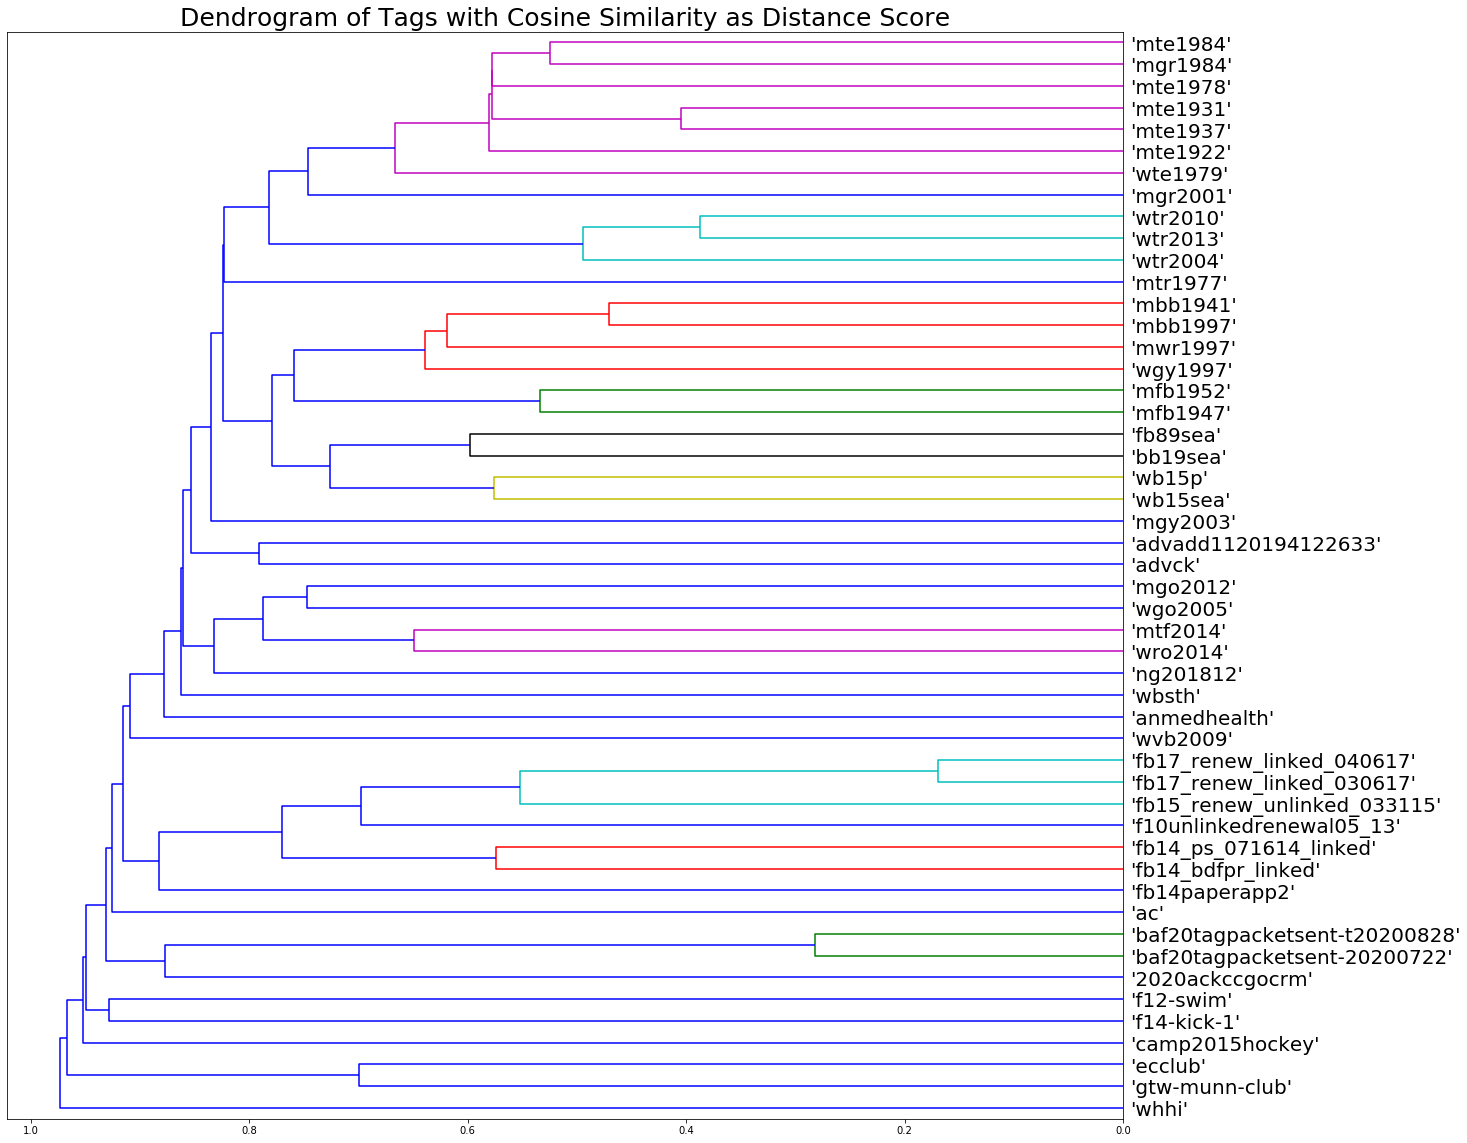

In [22]:
fig , ax1 = plt.subplots(figsize=(20,20))
dendrogram(cosine_score, labels = new_tag_list, orientation = "left")
plt.yticks(fontsize = 20)
plt.title("Dendrogram of Tags with Cosine Similarity as Distance Score", fontsize = 25)
plt.savefig("tag/dendrogram_tag.png",bbox_inches='tight')

In [102]:
cosine_score

array([[ 36.        ,  46.        ,   0.35932325,   2.        ],
       [ 14.        ,  29.        ,   0.371116  ,   2.        ],
       [  3.        ,  12.        ,   0.39960535,   2.        ],
       [ 13.        ,  57.        ,   0.47322306,   2.        ],
       [ 37.        ,  54.        ,   0.48651805,   2.        ],
       [ 17.        ,  22.        ,   0.498008  ,   2.        ],
       [ 24.        ,  59.        ,   0.50584247,   2.        ],
       [ 25.        ,  40.        ,   0.54294637,   2.        ],
       [ 56.        ,  62.        ,   0.56595992,   3.        ],
       [  1.        ,  53.        ,   0.61470806,   2.        ],
       [ 44.        ,  48.        ,   0.61710295,   2.        ],
       [ 30.        ,  69.        ,   0.6201796 ,   3.        ],
       [ 32.        ,  71.        ,   0.62340329,   4.        ],
       [ 20.        ,  72.        ,   0.63100929,   5.        ],
       [  7.        ,  27.        ,   0.63647934,   2.        ],
       [ 16.        ,  31

In [104]:
cosine_score

array([[0.        , 0.99069347, 1.        , ..., 0.99146551, 1.        ,
        0.99148911],
       [0.99069347, 0.        , 0.98813537, ..., 0.92857753, 0.92578759,
        0.76493766],
       [1.        , 0.98813537, 0.        , ..., 0.98911963, 0.98923899,
        0.98914971],
       ...,
       [0.99146551, 0.92857753, 0.98911963, ..., 0.        , 0.98855441,
        0.97590022],
       [1.        , 0.92578759, 0.98923899, ..., 0.98855441, 0.        ,
        0.98858605],
       [0.99148911, 0.76493766, 0.98914971, ..., 0.97590022, 0.98858605,
        0.        ]])